In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pymc3 as pm

%matplotlib inline

In [19]:
df = pd.read_csv('../data/globalterrorismdb_0617dist.csv', encoding='ISO-8859-1', low_memory=False)

df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [20]:
df.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [21]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackTypeText','attacktype1': 'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_Type','weaptype1_txt':'Weapon_Type','motive':'Motive', 'latitude': 'Latitude', 'longitude': 'Longitude', 'success': 'Success'},inplace=True)


In [22]:
terror=df[['Year','Month','Day','Country','Region','city','Latitude','Longitude','AttackTypeText','AttackType','Killed','Wounded','Target','Summary','Group','Target_Type','Weapon_Type','Motive', 'Success']].copy()
terror['Casualties']=terror['Killed']+terror['Wounded']
terror.head(3)

,Year,Month,Day,Country,Region,city,Latitude,Longitude,AttackTypeText,AttackType,Killed,Wounded,Target,Summary,Group,Target_Type,Weapon_Type,Motive,Success,Casualties
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1,1.0
1,1970,0,0,Mexico,North America,Mexico city,19.432608,-99.133207,Hostage Taking (Kidnapping),6,0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,1,0.0
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1,1.0


In [23]:
terror.isnull().sum()

Year                   0
Month                  0
Day                    0
Country                0
Region                 0
city                 446
Latitude            4606
Longitude           4606
AttackTypeText         0
AttackType             0
Killed              9682
Wounded            15325
Target               634
Summary            66138
Group                  0
Target_Type            0
Weapon_Type            0
Motive            121764
Success                0
Casualties         15826
dtype: int64

In [24]:
#Lets check out where terrorists attacks happen the most.

print('Country with the highest amount of terrorist attacks is:', terror['Country'].value_counts().index[0])
print('Region with the highest amount of terrorist attacks is:', terror['Region'].value_counts().index[0])
print('City with the highest number of terrorist attacks is:', terror['city'].value_counts().index[1])
print('Max number of people killed in a terrorist attack is: ', terror['Casualties'].max(),'that took place in', terror.loc[terror['Casualties'].idxmax()].Country)

Country with the highest amount of terrorist attacks is: Iraq
Region with the highest amount of terrorist attacks is: Middle East & North Africa
City with the highest number of terrorist attacks is: Baghdad
Max number of people killed in a terrorist attack is:  8749.0 that took place in United States


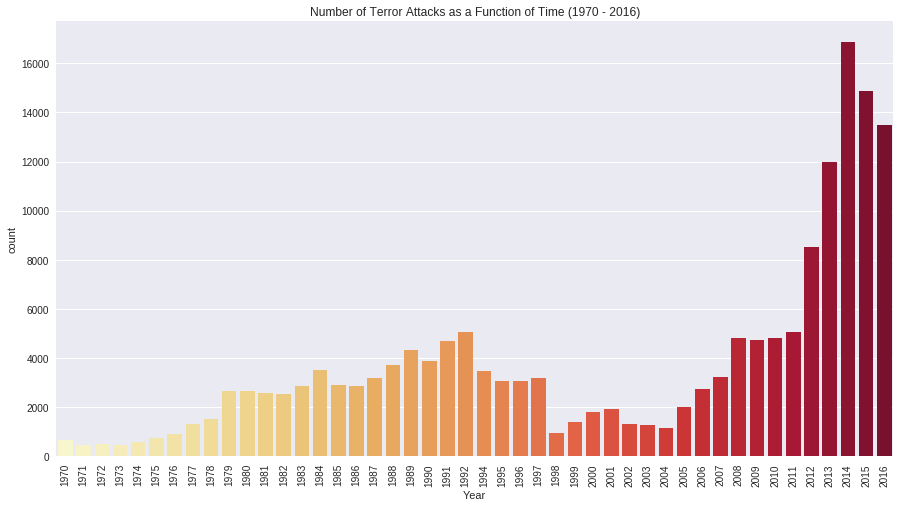

In [25]:
plt.subplots(figsize=(15,8))

sns.countplot('Year', data=terror, palette='YlOrRd')
plt.xticks(rotation=90)
plt.title("Number of Terror Attacks as a Function of Time (1970 - 2016)");

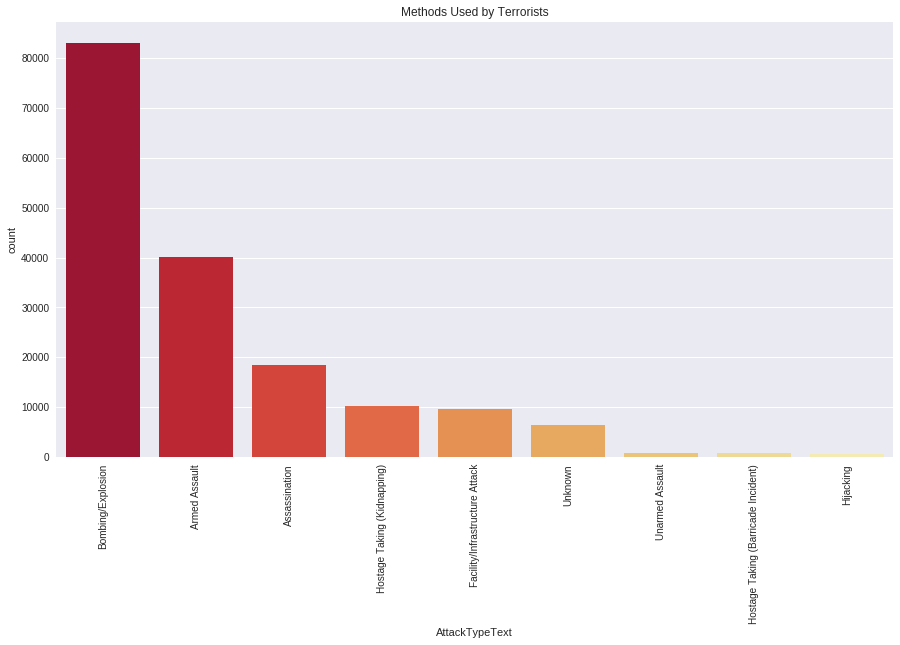

In [26]:
# Lets check methods
plt.subplots(figsize=(15,8))

sns.countplot('AttackTypeText', data = terror, palette='YlOrRd_r', order=terror['AttackTypeText'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Methods Used by Terrorists");

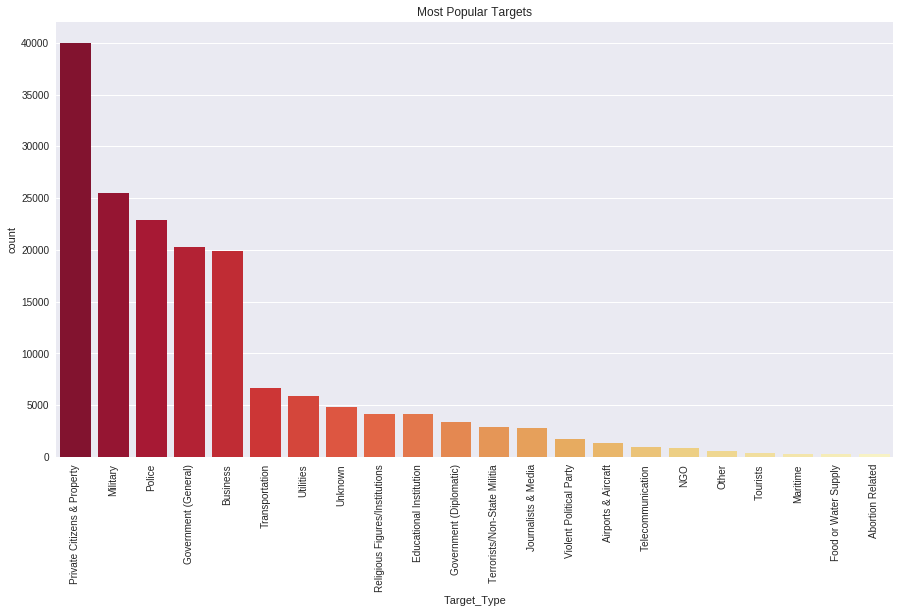

In [27]:
# Taking a look at the most targeted places 

plt.subplots(figsize=(15,8))

sns.countplot(terror['Target_Type'], palette='YlOrRd_r', order=terror['Target_Type'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Most Popular Targets");

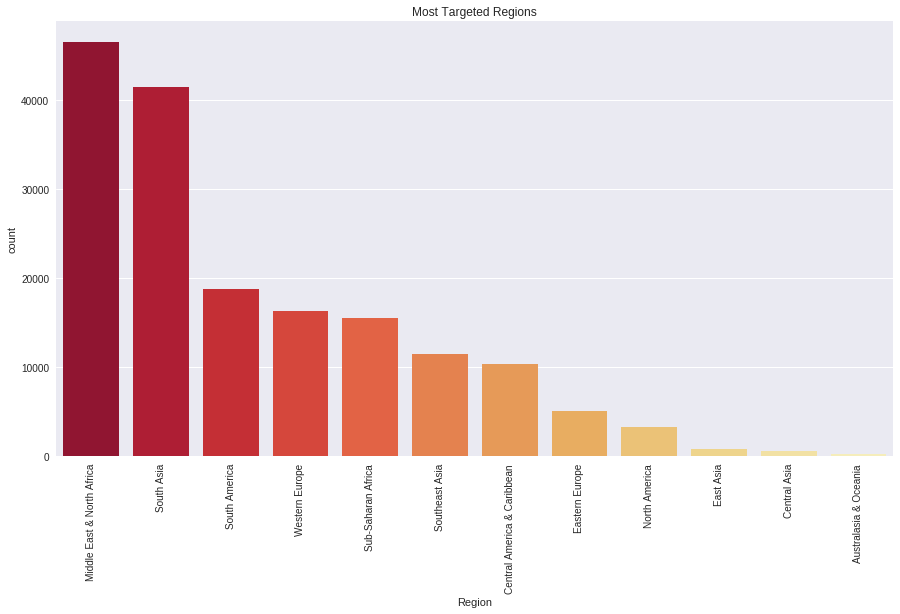

In [28]:
# Taking a look at each region on the globe

plt.subplots(figsize=(15,8))

sns.countplot(terror['Region'], palette='YlOrRd_r', order=terror['Region'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Most Targeted Regions");

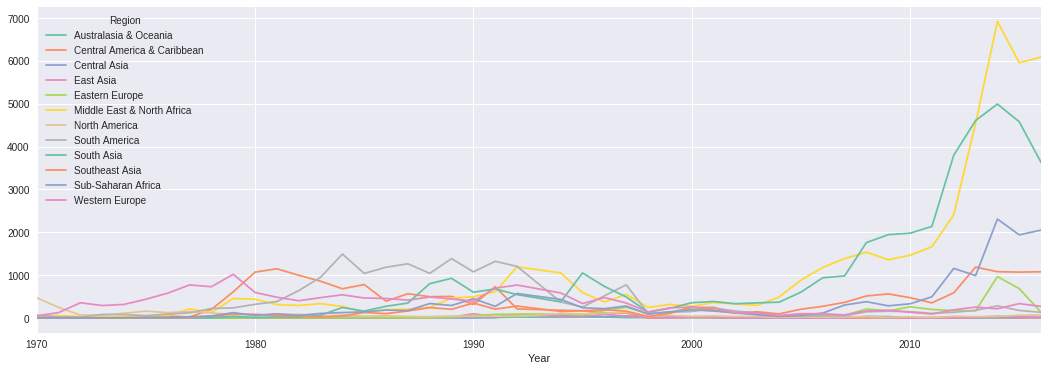

In [29]:
terror_region=pd.crosstab(terror.Year,terror.Region)
terror_region.plot(color=sns.color_palette('Set2',12))

fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

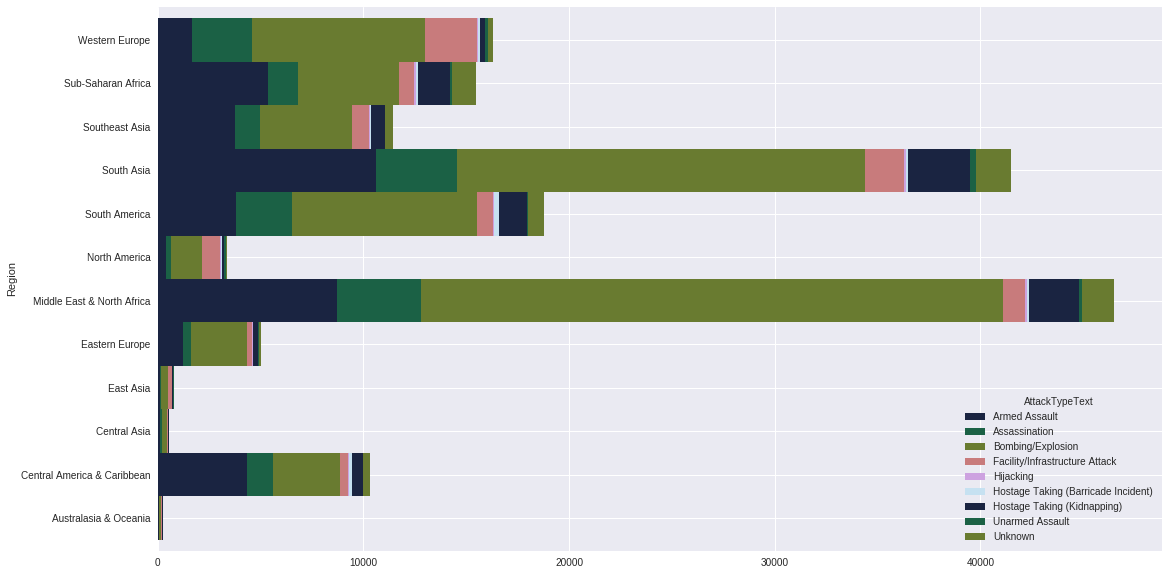

In [30]:
# Attack types across regions.

pd.crosstab(terror.Region, terror.AttackTypeText).plot.barh(stacked=True, width=1, color=sns.color_palette('cubehelix', 6))
fig = plt.gcf()
fig.set_size_inches(18,10)
plt.show()


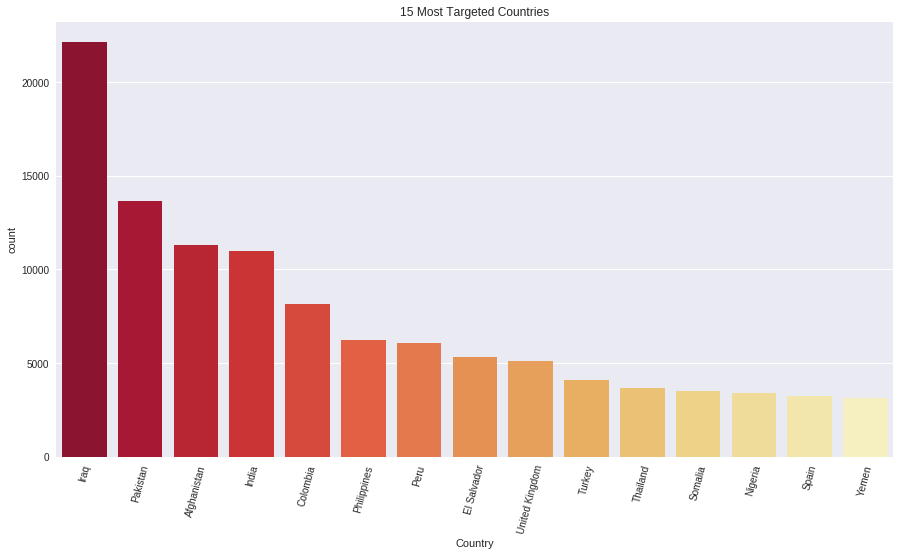

In [31]:
# Terrorism by Country - top 15

plt.subplots(figsize=(15,8))
sns.countplot(terror['Country'], palette='YlOrRd_r', order=terror['Country'].value_counts().index[:15])
plt.xticks(rotation=75)
plt.title("15 Most Targeted Countries");

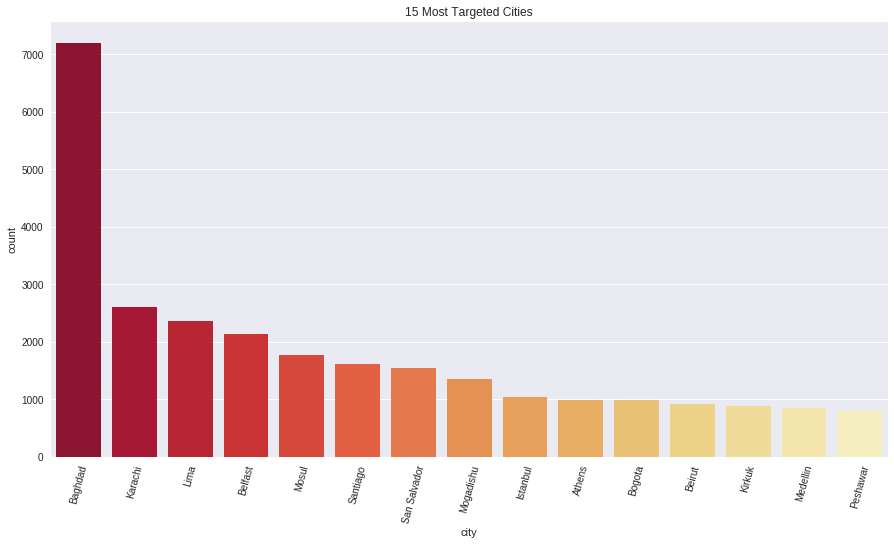

In [32]:
# Terrorism by City- top 15

plt.subplots(figsize=(15,8))
sns.countplot(terror['city'], palette='YlOrRd_r', order=terror['city'].value_counts().index[1:16])
plt.xticks(rotation=75)
plt.title("15 Most Targeted Cities");

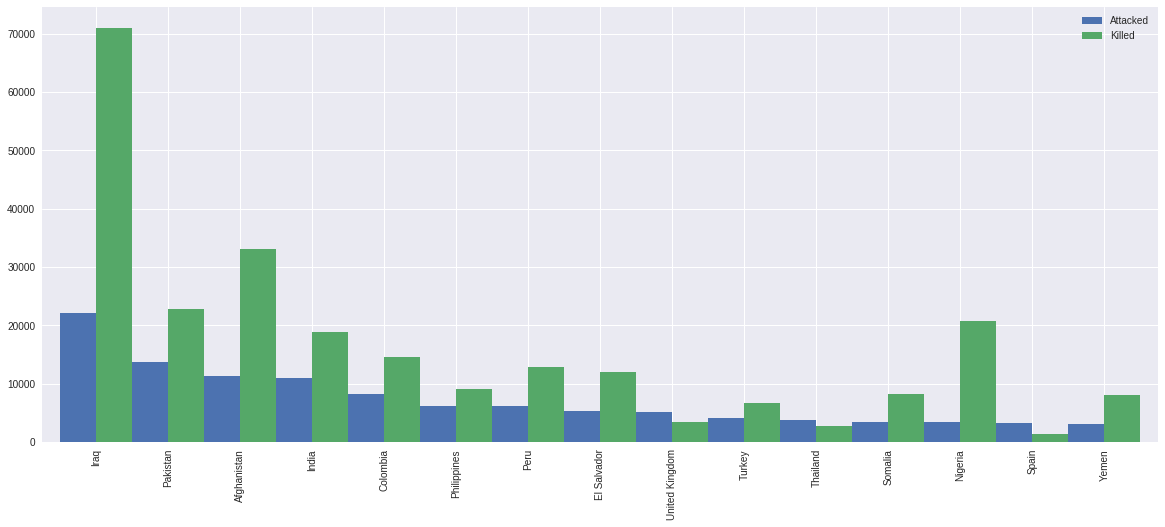

In [33]:
# Attacked vs. Killed... Jesus Christ Iraq

terror_count = terror['Country'].value_counts()[:15].to_frame(0)
terror_count.columns = ['Attacked']
kill_count = terror.groupby('Country')['Killed'].sum().to_frame()
terror_count.merge(kill_count, left_index=True, right_index=True, how='left').plot.bar(width=1.0)
fig = plt.gcf()
fig.set_size_inches(20,8)
plt.show()

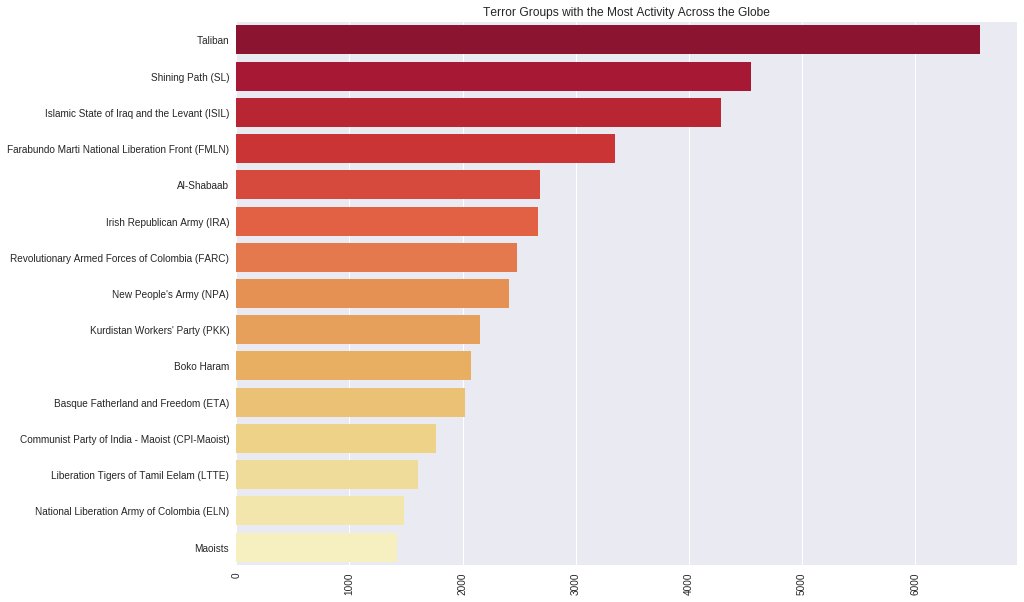

In [34]:
# Groups and how active they are.

sns.barplot(terror['Group'].value_counts()[1:16].values,terror['Group'].value_counts()[1:16].index, palette='YlOrRd_r')
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(14,10)
plt.title('Terror Groups with the Most Activity Across the Globe')

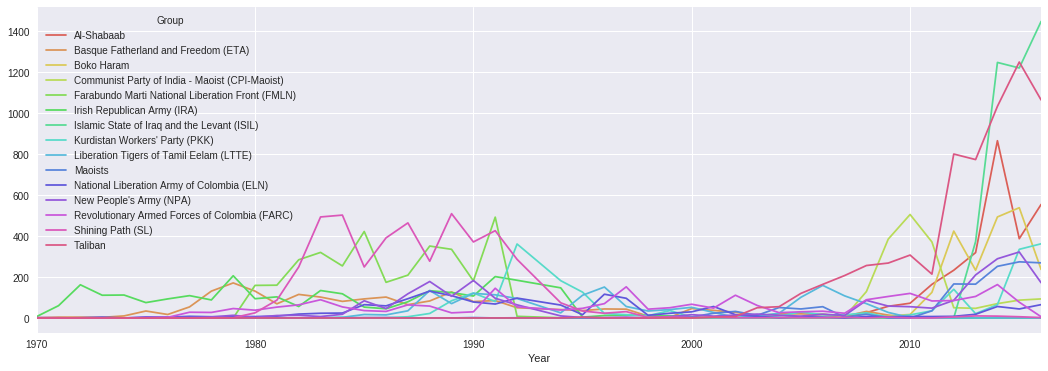

In [35]:
## Activity of top 15 groups across time. 

top_15 = terror[terror['Group'].isin(terror['Group'].value_counts()[1:16].index)]
pd.crosstab(top_15.Year, top_15.Group).plot(color =sns.color_palette("hls", 15))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

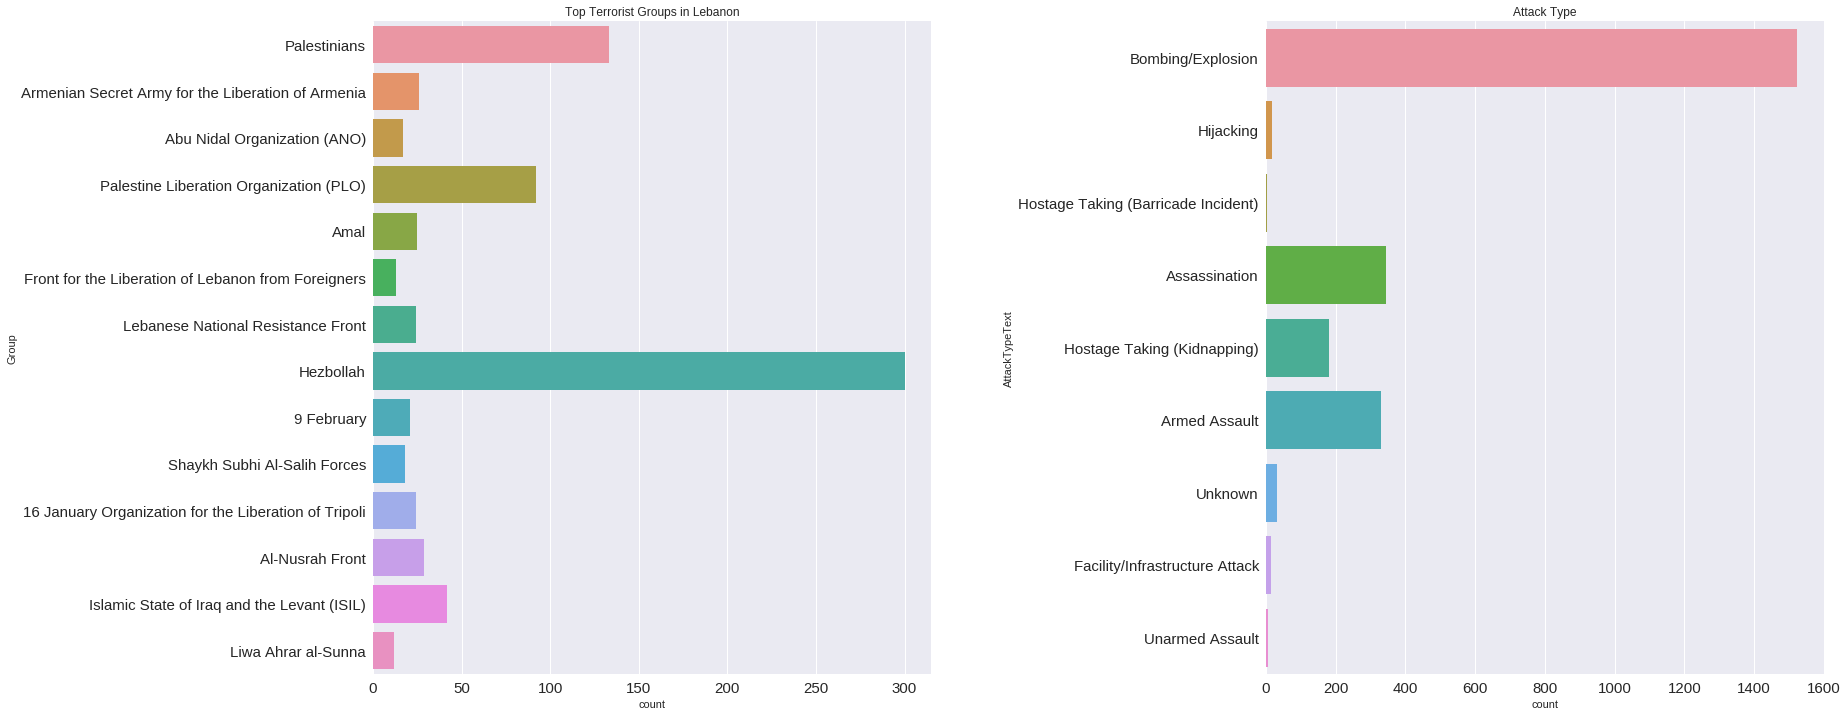

In [36]:
# Terrorism in Lebanon
fig, ax = plt.subplots(1,2, figsize=(26,12))

lebanon = terror[terror['Country'] == 'Lebanon']
lebanon_groups = lebanon['Group'].value_counts()[1:15].index
lebanon_groups = lebanon[lebanon['Group'].isin(lebanon_groups)]
sns.countplot(y='Group', data=lebanon_groups, ax=ax[0])
ax[0].set_title('Top Terrorist Groups in Lebanon')
sns.countplot(y='AttackTypeText', data=lebanon, ax=ax[1])
ax[1].set_title('Attack Type')
plt.subplots_adjust(hspace=0.3,wspace=0.6)
ax[0].tick_params(labelsize=15)
ax[1].tick_params(labelsize=15)
plt.show()

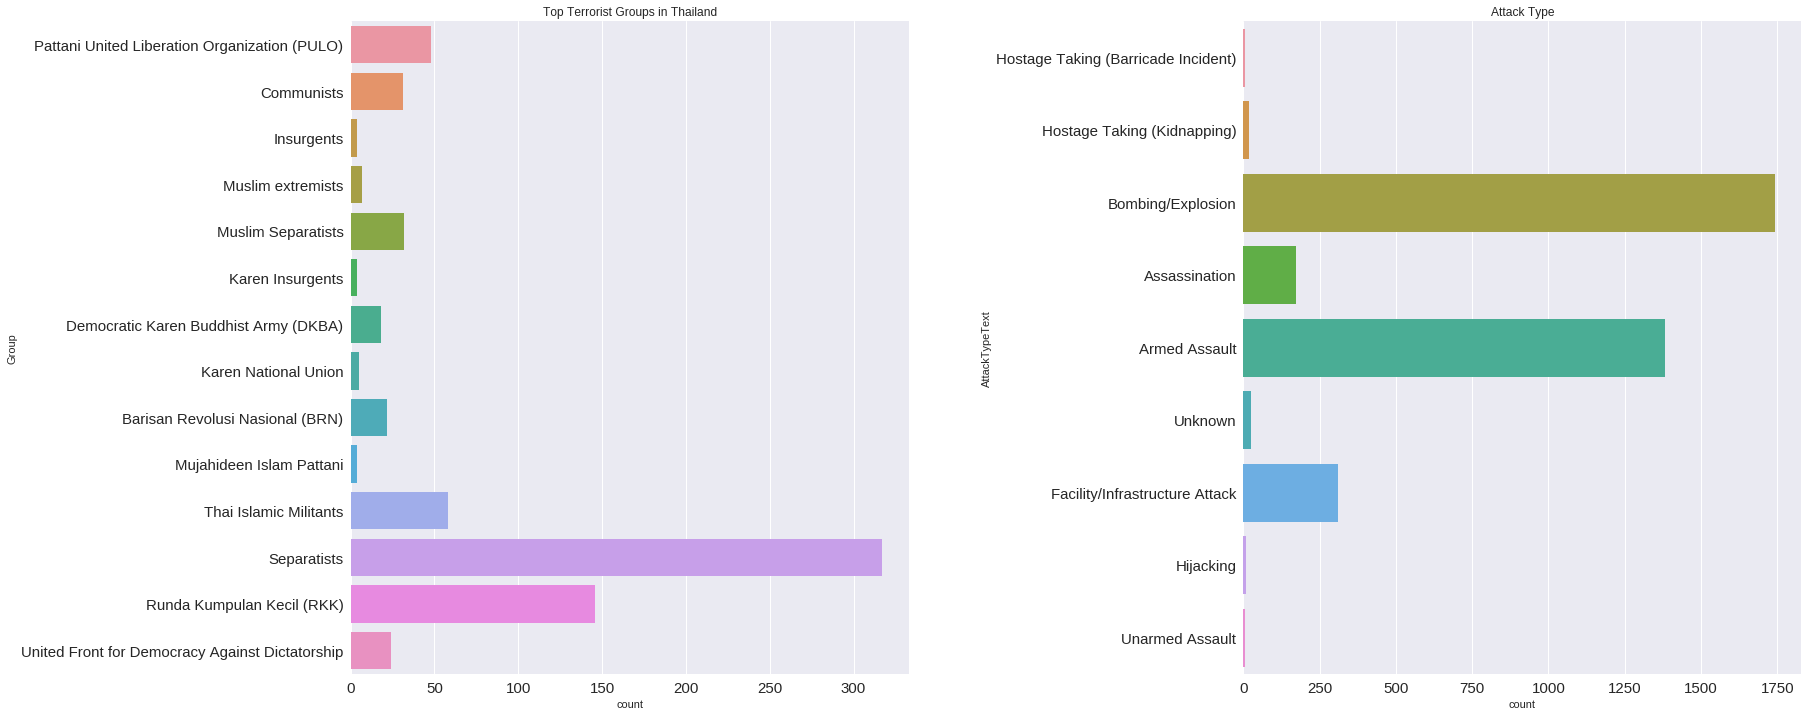

In [37]:
# Terrorism in Thailand
fig, ax = plt.subplots(1,2, figsize=(26,12))

thailand = terror[terror['Country'] == 'Thailand']
thailand_groups = thailand['Group'].value_counts()[1:15].index
thailand_groups = thailand[thailand['Group'].isin(thailand_groups)]
sns.countplot(y='Group', data=thailand_groups, ax=ax[0])
ax[0].set_title('Top Terrorist Groups in Thailand')
sns.countplot(y='AttackTypeText', data=thailand, ax=ax[1])
ax[1].set_title('Attack Type')
plt.subplots_adjust(hspace=0.3,wspace=0.6)
ax[0].tick_params(labelsize=15)
ax[1].tick_params(labelsize=15)
plt.show()

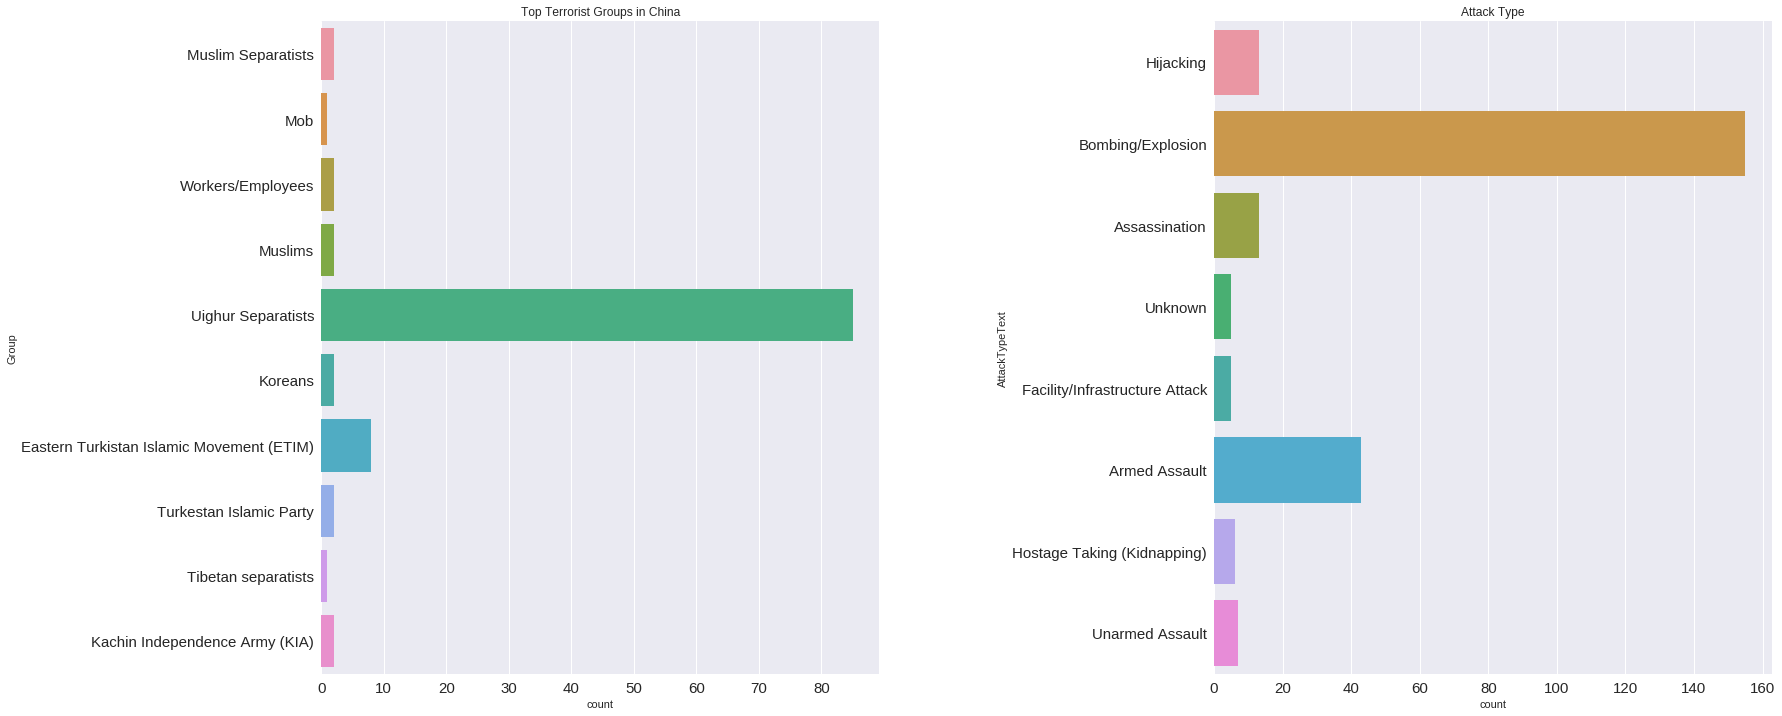

In [38]:
# Terrorism in China
fig, ax = plt.subplots(1,2, figsize=(26,12))

china = terror[terror['Country'] == 'China']
china_groups = china['Group'].value_counts()[1:15].index
china_groups = china[china['Group'].isin(china_groups)]
sns.countplot(y='Group', data=china_groups, ax=ax[0])
ax[0].set_title('Top Terrorist Groups in China')
sns.countplot(y='AttackTypeText', data=china, ax=ax[1])
ax[1].set_title('Attack Type')
plt.subplots_adjust(hspace=0.3,wspace=0.6)
ax[0].tick_params(labelsize=15)
ax[1].tick_params(labelsize=15)
plt.show()

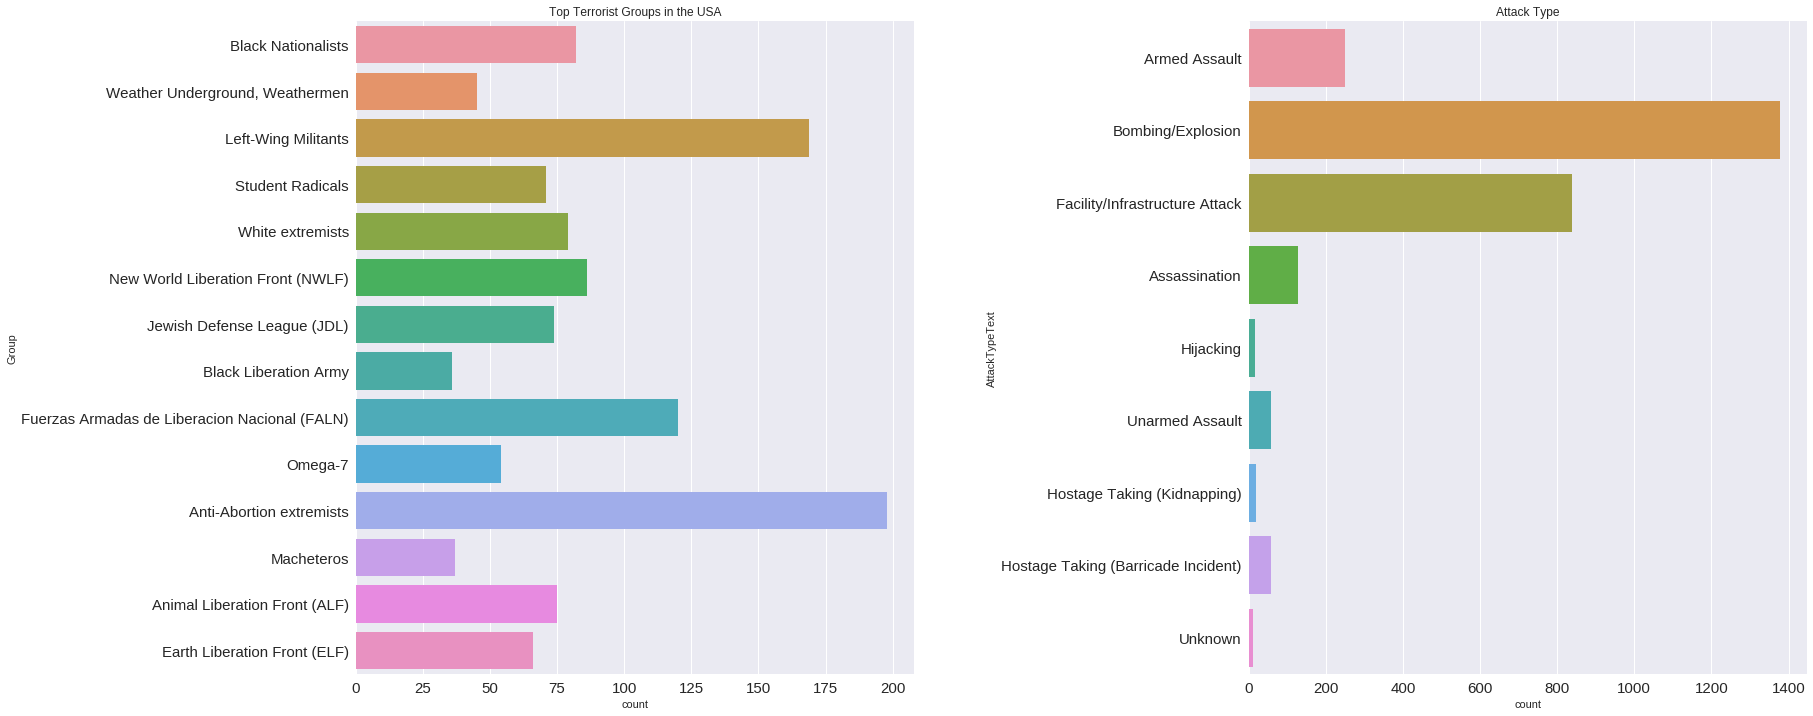

In [39]:
# Terrorism in the USA
fig, ax = plt.subplots(1,2, figsize=(26,12))

usa = terror[terror['Country'] == 'United States']
usa_groups = usa['Group'].value_counts()[1:15].index
usa_groups = usa[usa['Group'].isin(usa_groups)]
sns.countplot(y='Group', data=usa_groups, ax=ax[0])
ax[0].set_title('Top Terrorist Groups in the USA')
sns.countplot(y='AttackTypeText', data=usa, ax=ax[1])
ax[1].set_title('Attack Type')
plt.subplots_adjust(hspace=0.3,wspace=0.6)
ax[0].tick_params(labelsize=15)
ax[1].tick_params(labelsize=15)
plt.show()

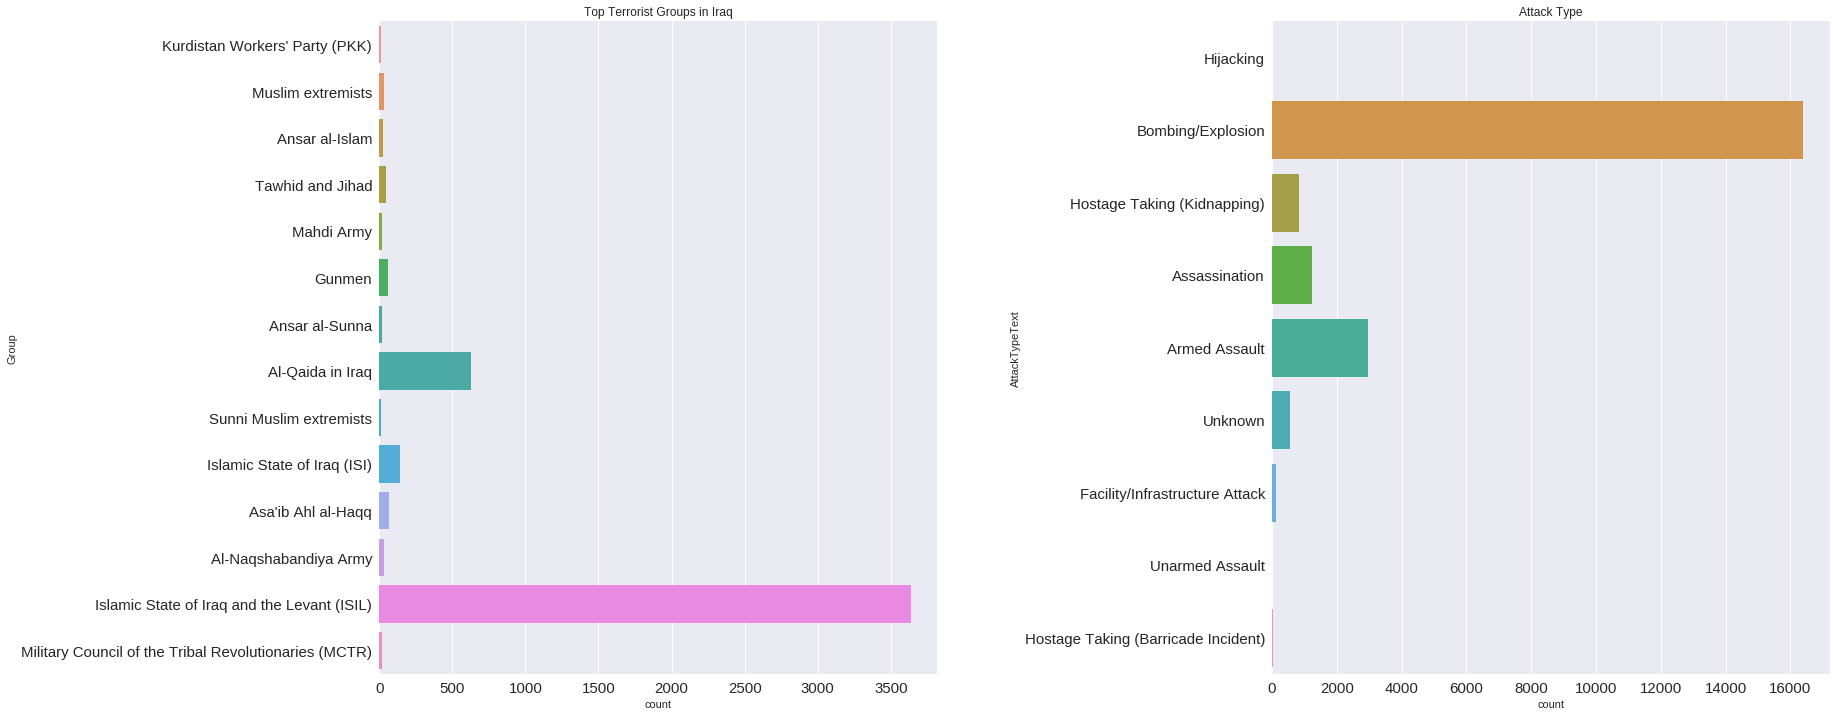

In [40]:
# Terrorism in Iraq

fig, ax = plt.subplots(1,2, figsize=(26,12))

iraq = terror[terror['Country'] == 'Iraq']
iraq_groups = iraq['Group'].value_counts()[1:15].index
iraq_groups = iraq[iraq['Group'].isin(iraq_groups)]
sns.countplot(y='Group', data=iraq_groups, ax=ax[0])
ax[0].set_title('Top Terrorist Groups in Iraq')
sns.countplot(y='AttackTypeText', data=iraq, ax=ax[1])
ax[1].set_title('Attack Type')
plt.subplots_adjust(hspace=0.3,wspace=0.6)
ax[0].tick_params(labelsize=15)
ax[1].tick_params(labelsize=15)
plt.show()

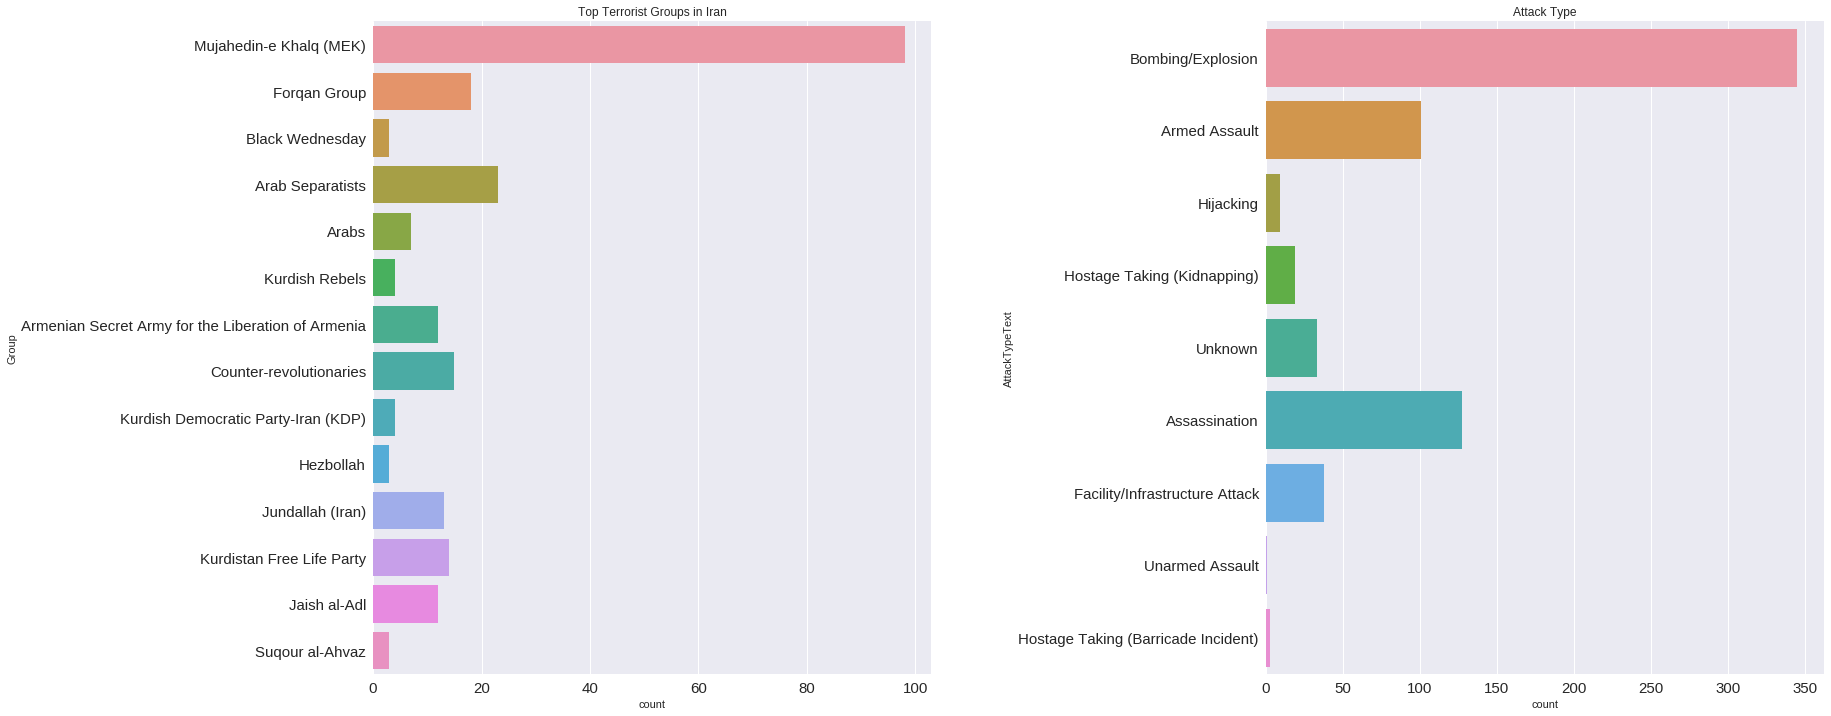

In [41]:
# Terrorism in Iran

fig, ax = plt.subplots(1,2, figsize=(26,12))

iran = terror[terror['Country'] == 'Iran']
iran_groups = iran['Group'].value_counts()[1:15].index
iran_groups = iran[iran['Group'].isin(iran_groups)]
sns.countplot(y='Group', data=iran_groups, ax=ax[0])
ax[0].set_title('Top Terrorist Groups in Iran')
sns.countplot(y='AttackTypeText', data=iran, ax=ax[1])
ax[1].set_title('Attack Type')
plt.subplots_adjust(hspace=0.3,wspace=0.6)
ax[0].tick_params(labelsize=15)
ax[1].tick_params(labelsize=15)
plt.show()

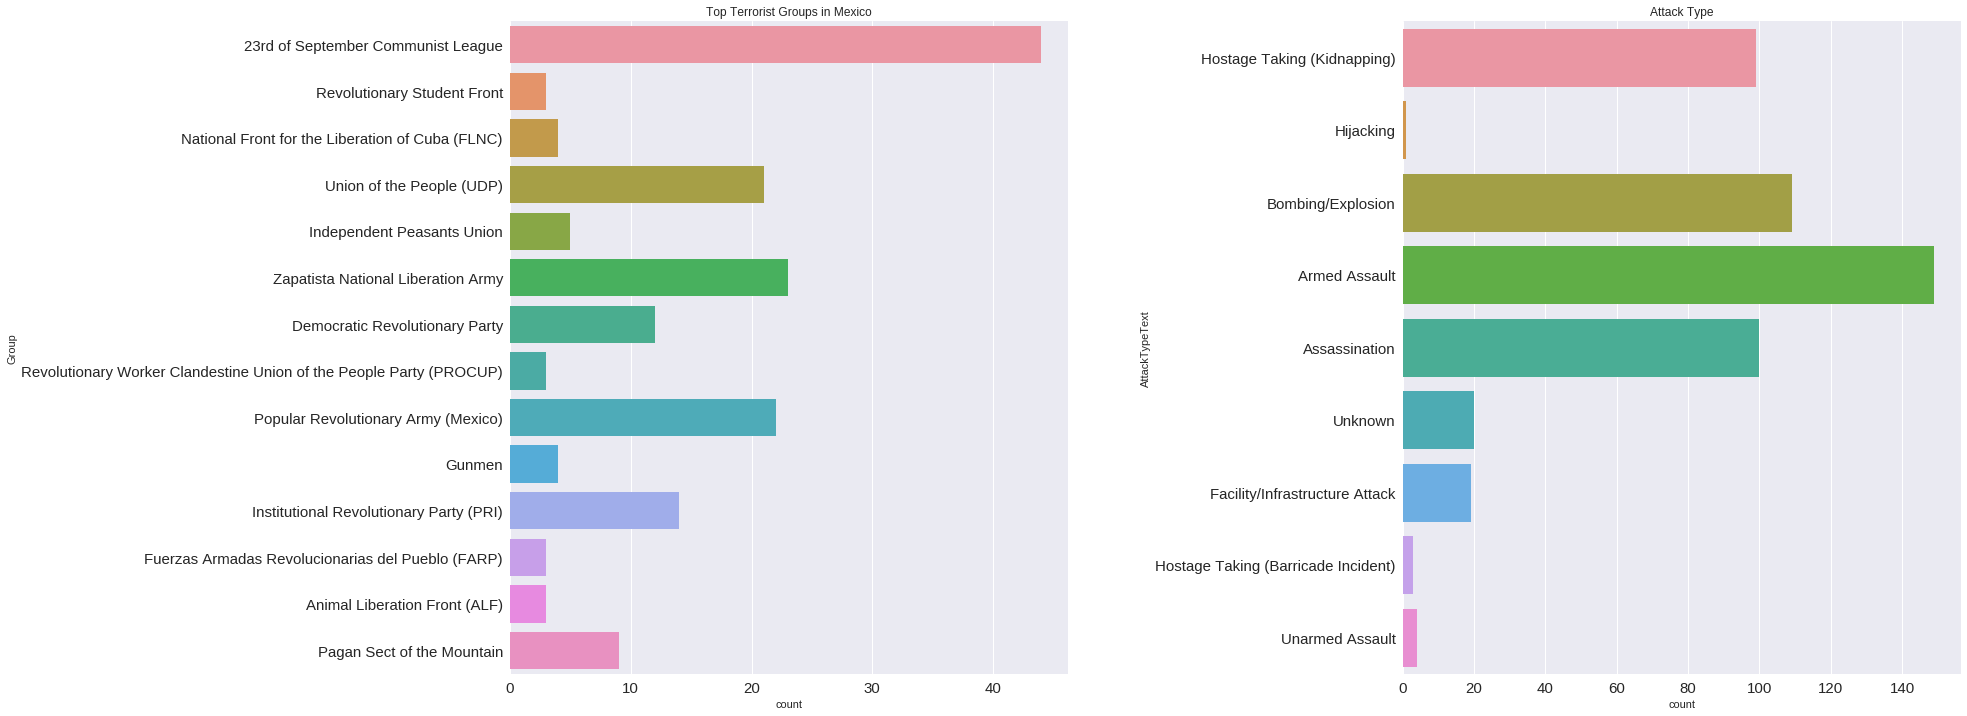

In [42]:
# Terrorism in Mexico

fig, ax = plt.subplots(1,2, figsize=(26,12))

mexico = terror[terror['Country'] == 'Mexico']
mexico_groups = mexico['Group'].value_counts()[1:15].index
mexico_groups = mexico[mexico['Group'].isin(mexico_groups)]
sns.countplot(y='Group', data=mexico_groups, ax=ax[0])
ax[0].set_title('Top Terrorist Groups in Mexico')
sns.countplot(y='AttackTypeText', data=mexico, ax=ax[1])
ax[1].set_title('Attack Type')
plt.subplots_adjust(hspace=0.3,wspace=0.6)
ax[0].tick_params(labelsize=15)
ax[1].tick_params(labelsize=15)
plt.show()